### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Collection

In [3]:
calories_data = pd.read_csv('calories.csv')

In [4]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
calories_data.shape

(15000, 2)

In [6]:
exercise_data = pd.read_csv('exercise.csv')

In [7]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
exercise_data.shape

(15000, 8)

In [9]:
data = pd.merge(exercise_data, calories_data, on='User_ID', how='left')

In [10]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
data.shape

(15000, 9)

### Data Preprocessing

In [12]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
# now checking data distribution

In [16]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

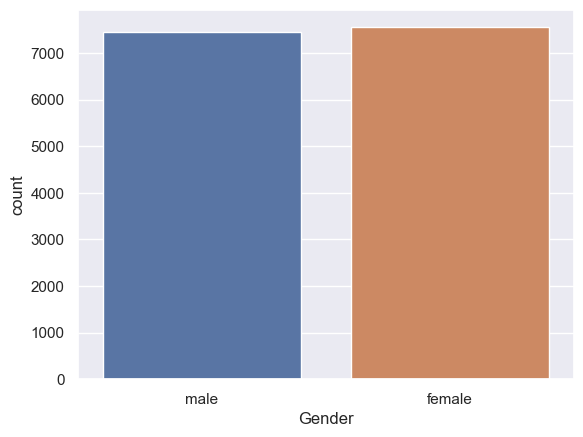

In [17]:
sns.countplot(x = 'Gender',data = data)

Text(0.5, 1.0, 'Age Distribution')

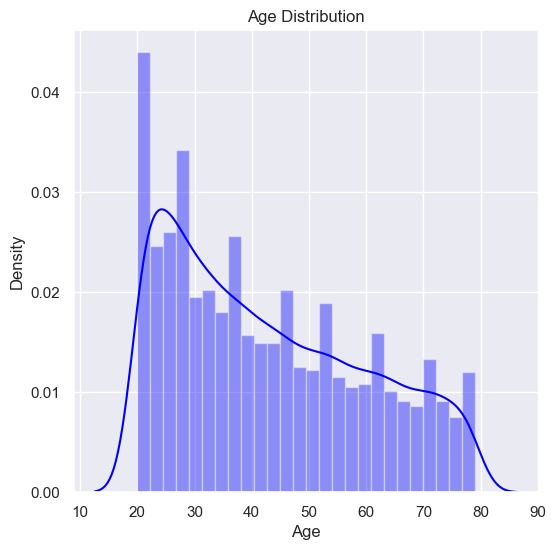

In [18]:
plt.figure(figsize = (6,6))
sns.distplot(data['Age'],color = 'blue')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Height Distribution')

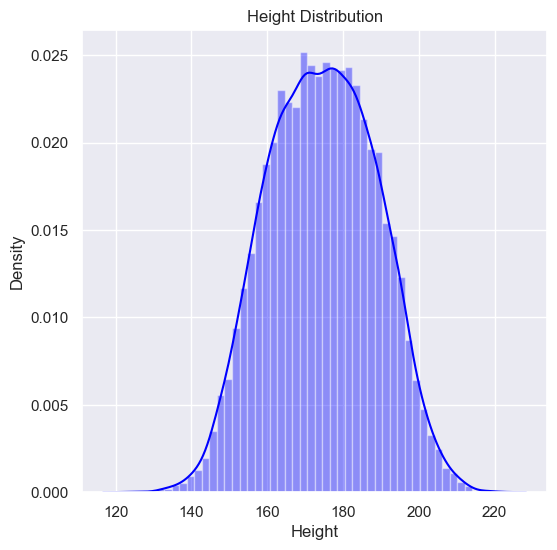

In [19]:
plt.figure(figsize = (6,6))
sns.distplot(data['Height'],color = 'blue')
plt.title("Height Distribution")

Text(0.5, 1.0, 'Weight Distribution')

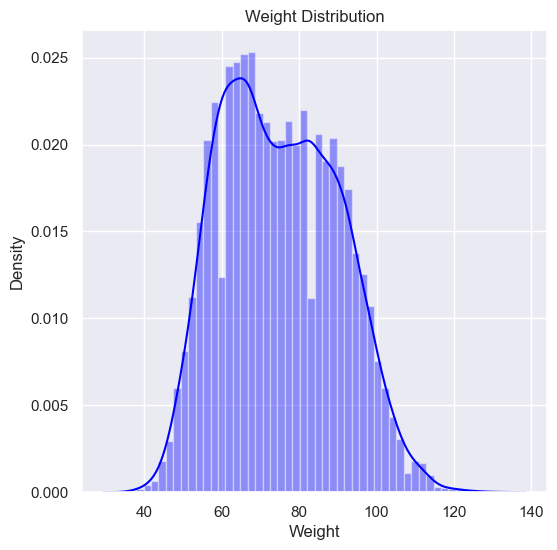

In [20]:
plt.figure(figsize = (6,6))
sns.distplot(data['Weight'],color = 'blue')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Exercise Duration Distribution')

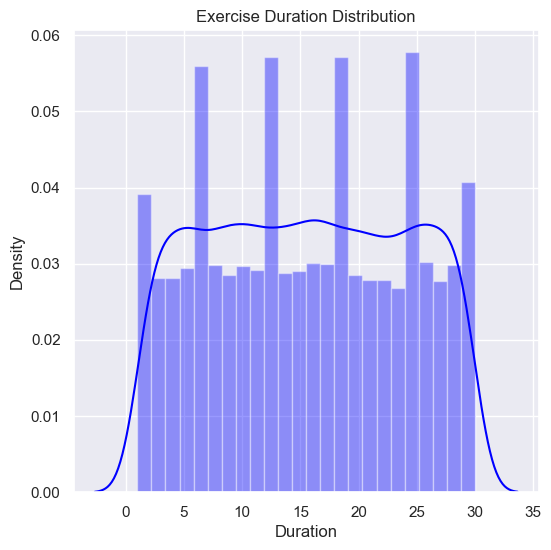

In [21]:
plt.figure(figsize = (6,6))
sns.distplot(data['Duration'],color = 'blue')
plt.title("Exercise Duration Distribution")

Text(0.5, 1.0, 'Heart Rate Distribution')

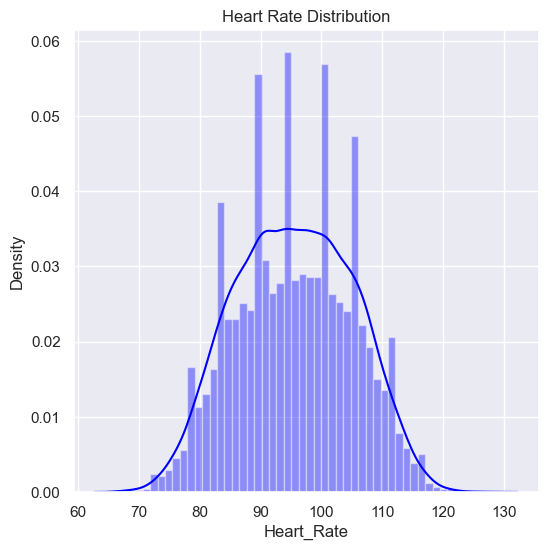

In [22]:
plt.figure(figsize = (6,6))
sns.distplot(data['Heart_Rate'],color = 'blue')
plt.title("Heart Rate Distribution")

Text(0.5, 1.0, 'Body Temperature Distribution')

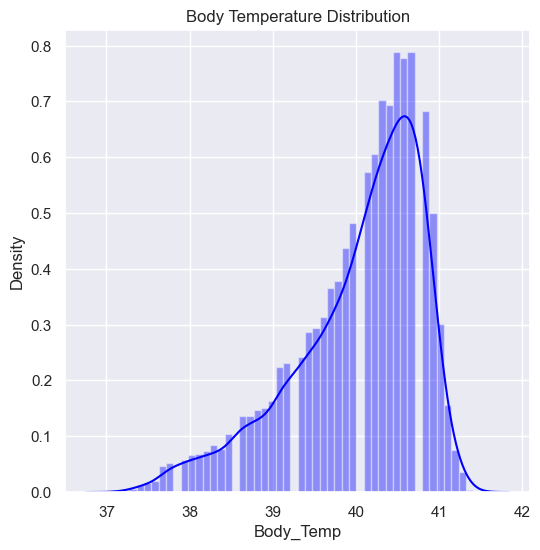

In [23]:
plt.figure(figsize = (6,6))
sns.distplot(data['Body_Temp'],color = 'blue')
plt.title("Body Temperature Distribution")

Text(0.5, 1.0, 'Calories Distribution')

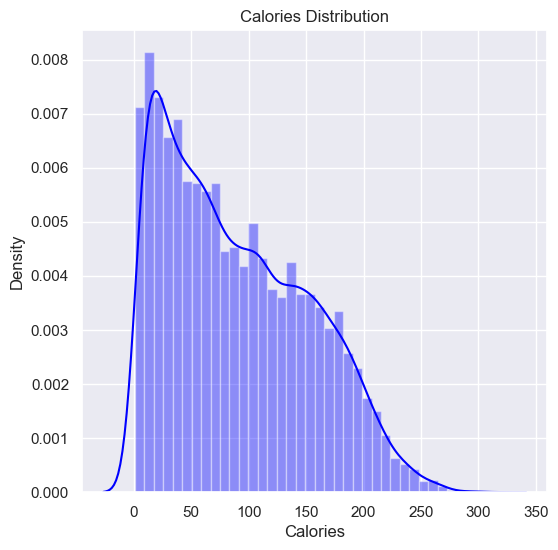

In [24]:
plt.figure(figsize = (6,6))
sns.distplot(data['Calories'],color = 'blue')
plt.title("Calories Distribution")

In [25]:
# label encoding

In [26]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [27]:
def label_encoder(df):
    le = LabelEncoder()
    for col in df.columns:
        if data[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
            
    return df

In [28]:
data = label_encoder(data)

In [29]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [30]:
data.shape

(15000, 9)

In [31]:
# now plotting correlation matrix for better understanding of features cross relationship.

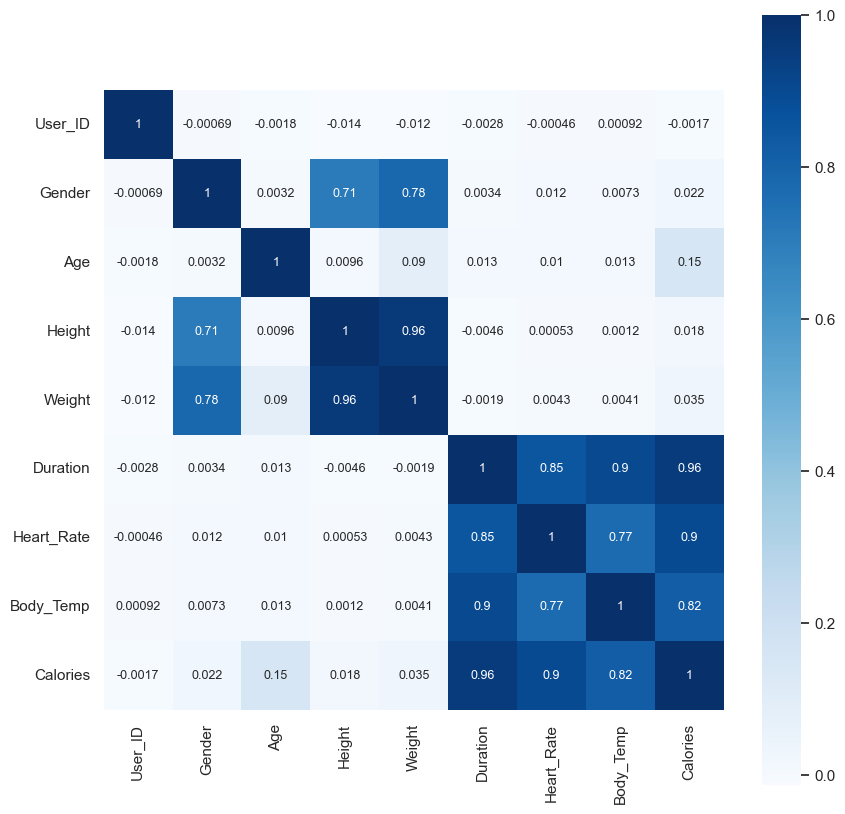

In [32]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':9},cmap = 'Blues')
plt.show()

In [33]:
# splitting features and target

In [34]:
X = data.drop(['User_ID','Calories'],axis = 1)
y = data.Calories

In [35]:
print(X.shape)
print(y.shape)

(15000, 7)
(15000,)


In [36]:
scaler = MinMaxScaler()

In [37]:
scaled_data = scaler.fit_transform(X)

In [38]:
scaled_data[0]

array([1.        , 0.81355932, 0.67676768, 0.60416667, 0.96551724,
       0.62295082, 0.84090909])

### Train_Test_Splits

In [39]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y, test_size = 0.1)

In [40]:
x_train.shape

(13500, 7)

In [41]:
y_train.shape

(13500,)

In [42]:
x_test.shape

(1500, 7)

In [43]:
y_test.shape

(1500,)

### Models Training with GridSearchCV

In [44]:
import pickle
import pandas as pd
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        
        'random_forest_regression': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [200, 300],
                'max_depth': [None, 15, 30],
                'min_samples_split': [2, 7],
                'min_samples_leaf': [1, 3]
            }
        },
        
        'xgboost_regression': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [45]:
stats = gridsearchcv(x_train,y_train)

In [46]:
stats.to_csv('stats.csv')

In [47]:
stats

,model,best_score,best_params
0,linear_regression,0.966810,{}
1,random_forest_regression,0.997885,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_..."
2,xgboost_regression,0.999278,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."


### Models Evaluation

#### Linear Regression Model Evaluation

In [48]:
with open('linear_regression_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [49]:
model1.score(x_train,y_train)

0.9670546858690857

In [50]:
model1.score(x_test,y_test)

0.9683891764758245

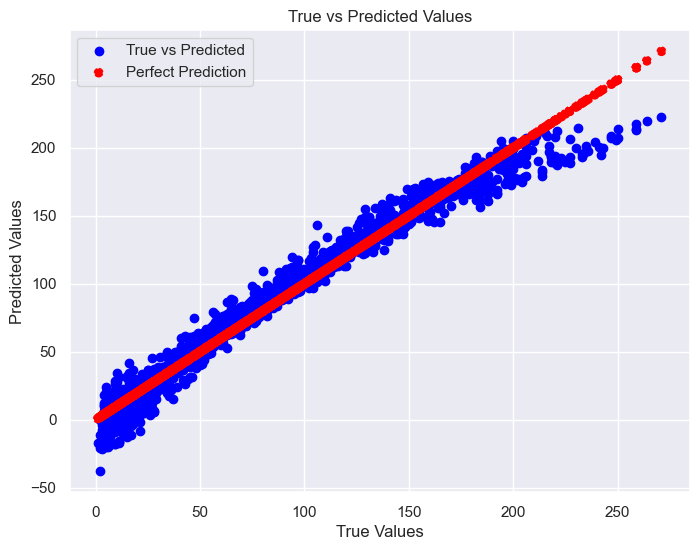

In [51]:
y_true = list(y_test)
y_predict = list(model1.predict(x_test))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#### Random Forest Regression Model Evaluation

In [52]:
with open('random_forest_regression_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [53]:
model2.score(x_train,y_train)

0.9997313960400248

In [54]:
model2.score(x_test,y_test)

0.9983818322457021

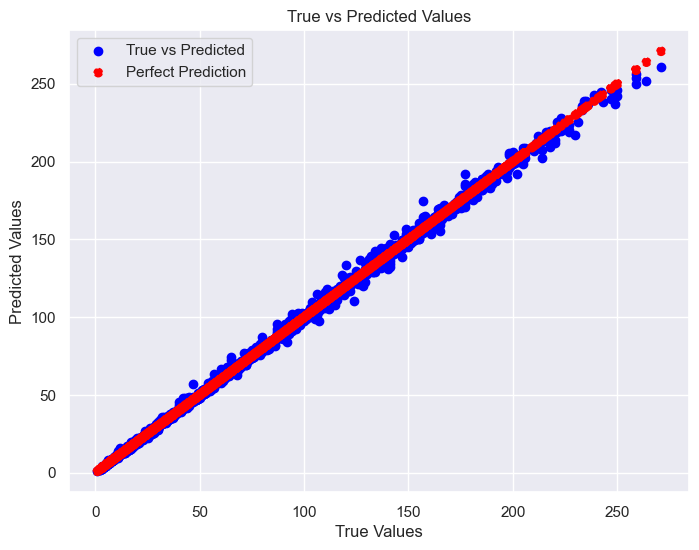

In [55]:
y_true = list(y_test)
y_predict = list(model2.predict(x_test))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#### XGBoost Regression Model Evaluation

In [56]:
with open('xgboost_regression_model.p', 'rb') as file:
    model3 = pickle.load(file)

In [57]:
model3.score(x_train,y_train)

0.999820898246752

In [58]:
model3.score(x_test,y_test)

0.9994283570018441

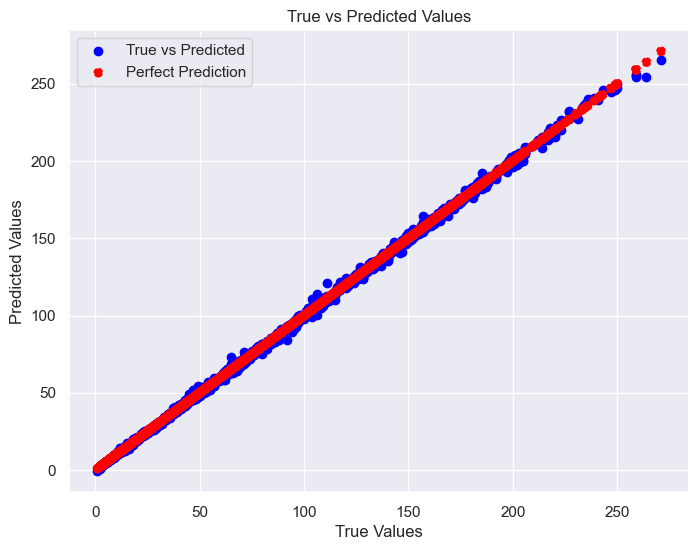

In [59]:
y_true = list(y_test)
y_predict = list(model3.predict(x_test))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()